In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.cross_validation import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import GridSearchCV

from sklearn import svm
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.svm import SVR
from sklearn.metrics import r2_score
from sklearn.cross_validation import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn import linear_model
from sklearn.linear_model import Ridge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn import ensemble
from sklearn.ensemble import GradientBoostingRegressor

from sklearn.feature_selection import RFE

import seaborn as sns

In [ ]:
HP=pd.read_csv('brooklyn_sales_map.csv')
print(HP.shape)
HP.head()

In [6]:
HP.describe().append(HP.isnull().sum().rename('isnull'))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28812\3537787300.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  HP.describe().append(HP.isnull().sum().rename('isnull'))


,Unnamed: 0,borough,block,lot,easement,zip_code,residential_units,commercial_units,total_units,land_sqft,gross_sqft,year_built,tax_class_at_sale,sale_price,year_of_sale,CD,CT2010,CB2010,SchoolDist,Council,ZipCode,PolicePrct,HealthCent,HealthArea,SanitBoro,SanitDistr,LandUse,Easements,LotArea,BldgArea,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,AreaSource,NumBldgs,NumFloors,UnitsRes,UnitsTotal,LotFront,LotDepth,BldgFront,BldgDepth,ProxCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearBuilt,YearAlter1,YearAlter2,BuiltFAR,ResidFAR,CommFAR,FacilFAR,BoroCode,BBL,CondoNo,Tract2010,XCoord,YCoord,TaxMap,APPBBL,PLUTOMapID,FIRM07_FLA,PFIRM15_FL,MAPPLUTO_F,SHAPE_Leng,SHAPE_Area,APPDate,Address,BldgClass,Borough,EDesigNum,Ext,FireComp,HistDist,IrrLotCode,Landmark,LtdHeight,Overlay1,Overlay2,OwnerName,OwnerType,SPDist1,SPDist2,SPDist3,Sanborn,SanitSub,SplitZone,Version,ZMCode,ZoneDist1,ZoneDist2,ZoneDist3,ZoneDist4,ZoneMap,address,apartment_number,building_class,building_class_at_sale,building_class_category,neighborhood,sale_date,tax_class
count,390883.000000,390883.0,390883.000000,390883.000000,0.0,390883.000000,390883.000000,390883.000000,390883.000000,3.908830e+05,3.908830e+05,390883.000000,390883.000000,3.908830e+05,390883.000000,303728.000000,303436.000000,302515.000000,303688.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303238.000000,303238.000000,302711.000000,303728.000000,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303706.000000,303706.000000,303706.000000,3.037280e+05,3.037280e+05,3.037280e+05,3.037280e+05,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.000000,303728.0,3.037280e+05,303728.000000,303728.000000,3.037280e+05,303728.000000,303710.000000,3.037280e+05,303728.000000,8653.0,27773.0,303728.000000,303728.000000,3.037280e+05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,195442.000000,3.0,4275.651169,272.509986,NaN,11208.429087,2.486138,0.174142,2.673227,2.368464e+03,2.970877e+03,1701.666307,1.642660,5.067545e+05,2009.478243,309.783211,492.221200,1971.065160,19.089803,40.888522,11207.063718,71.830012,34.460293,5758.185060,3.000326,9.776390,2.188791,0.007049,8.459416e+03,2.361238e+04,1.207292e+03,2.221657e+04,1.584349e+02,2.743297e+02,2.489965e+02,1.156844e+02,1.732853e+02,209.225606,2.086038,1.314824,3.102166,22.082923,22.347620,53.086843,109.695027,39.399567,59.381591,1.566637,4.742886,2.439326,1.209784e+05,7.813468e+05,4.136623e+04,8.105911e+04,1879.716700,295.778483,34.019662,1.662472,1.828681,0.153269,2.854437,3.0,3.045066e+09,0.029987,4715.545455,9.921077e+05,175146.073694,31396.728152,1.927884e+08,1.000145,1.0,1.0,0.000244,337.445796,8.645885e+03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,112838.346973,0.0,2642.765332,484.658837,NaN,361.207836,48.200178,1.653362,48.233343,2.509129e+04,1.453960e+04,636.764362,0.906378,2.353965e+06,4.504907,5.457593,331.650433,992.300369,4.221940,4.648494,382.456905,8.632760,2.514558,2576.513859,0.019130,5.455605,1.912236,0.086297,3.140562e+04,8.164505e+04,1.307823e+04,7.949109e+04,4.274347e+03,3.486221e+03,5.525525e+03,5.206794e+03,5.201557e+03,4586.906650,0.560690,2.247752,2.927788,79.764423,79.954151,99.398538,63.857962,56.369625,43.217604,1.206424,0.701608,1.559428,7.152424e+05,3.227031e+06,2.495788e+05,1.524291e+06,317.759012,710.334178,259.086380,1.549262,1.139002,0.811046,1.428735,0.0,2.571172e+07,8.840051,17545.128104,7.391759e+04,18390.569903,754.905314,7.409608e+08,0.017021,0.0,0.0,0.036740,329.587401,3.116106e+04,NaN,NaN,NaN,NaN,NaN,NaN

In [7]:
HP.columns.values

array(['Unnamed: 0', 'borough', 'neighborhood', 'building_class_category',
       'tax_class', 'block', 'lot', 'easement', 'building_class',
       'address', 'apartment_number', 'zip_code', 'residential_units',
       'commercial_units', 'total_units', 'land_sqft', 'gross_sqft',
       'year_built', 'tax_class_at_sale', 'building_class_at_sale',
       'sale_price', 'sale_date', 'year_of_sale', 'Borough', 'CD',
       'CT2010', 'CB2010', 'SchoolDist', 'Council', 'ZipCode', 'FireComp',
       'PolicePrct', 'HealthCent', 'HealthArea', 'SanitBoro',
       'SanitDistr', 'SanitSub', 'Address', 'ZoneDist1', 'ZoneDist2',
       'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2', 'SPDist1',
       'SPDist2', 'SPDist3', 'LtdHeight', 'SplitZone', 'BldgClass',
       'LandUse', 'Easements', 'OwnerType', 'OwnerName', 'LotArea',
       'BldgArea', 'ComArea', 'ResArea', 'OfficeArea', 'RetailArea',
       'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'AreaSource',
       'NumBldgs', 'NumFloors

In [8]:
columns = ['Unnamed: 0', 'borough', 'Borough','apartment_number', 'Ext', 'Landmark','AreaSource', 'UnitsRes', 'UnitsTotal', 'LotArea', 'BldgArea','BldgClass','Easements', 'easement', 'OwnerType', 'building_class_category','sale_date', 'CT2010', 'CB2010', 'ZipCode', 'ZoneDist1', 'ZoneDist2', 'ZoneDist3', 'ZoneDist4', 'Overlay1', 'Overlay2', 'SPDist1', 'SPDist2', 'SPDist3', 'LtdHeight', 'YearBuilt', 'BoroCode', 'BBL', 'Tract2010', 'ZoneMap', 'ZMCode', 'Sanborn', 'TaxMap', 'EDesigNum', 'PLUTOMapID', 'FIRM07_FLA', 'PFIRM15_FL', 'Version', 'MAPPLUTO_F', 'APPBBL', 'APPDate', 'SHAPE_Leng', 'SHAPE_Area','CD', 'SchoolDist', 'Council', 'PolicePrct', 'HealthCent', 'SanitBoro', 'SanitDistr','FireComp','SanitSub', 'CondoNo','Address']
HP.drop(columns, inplace=True, axis=1)

In [9]:
HP.columns.values

array(['neighborhood', 'tax_class', 'block', 'lot', 'building_class',
       'address', 'zip_code', 'residential_units', 'commercial_units',
       'total_units', 'land_sqft', 'gross_sqft', 'year_built',
       'tax_class_at_sale', 'building_class_at_sale', 'sale_price',
       'year_of_sale', 'HealthArea', 'SplitZone', 'LandUse', 'OwnerName',
       'ComArea', 'ResArea', 'OfficeArea', 'RetailArea', 'GarageArea',
       'StrgeArea', 'FactryArea', 'OtherArea', 'NumBldgs', 'NumFloors',
       'LotFront', 'LotDepth', 'BldgFront', 'BldgDepth', 'ProxCode',
       'IrrLotCode', 'LotType', 'BsmtCode', 'AssessLand', 'AssessTot',
       'ExemptLand', 'ExemptTot', 'YearAlter1', 'YearAlter2', 'HistDist',
       'BuiltFAR', 'ResidFAR', 'CommFAR', 'FacilFAR', 'XCoord', 'YCoord'],
      dtype=object)

In [10]:
HP=HP[HP['sale_price']!=0]
HP['gross_sqft']=HP['gross_sqft'].replace(0.0,HP['gross_sqft'].median())
HP['land_sqft']=HP['land_sqft'].replace(0.0,HP['land_sqft'].median())
HP['NumBldgs']= HP['NumBldgs'].fillna(HP['NumBldgs'].median())
HP['NumFloors']= HP['NumFloors'].fillna(HP['NumFloors'].median())
HP['ProxCode']= HP['ProxCode'].fillna(HP['ProxCode'].mode()[0])
HP['LotType']= HP['LotType'].fillna(HP['LotType'].mode()[0])
HP['BsmtCode']= HP['BsmtCode'].fillna(HP['BsmtCode'].mode()[0])
HP['LandUse']= HP['LandUse'].fillna(HP['LandUse'].mode()[0])
HP['AssessLand']= HP['AssessLand'].fillna(HP['AssessLand'].median())
HP['AssessTot']= HP['AssessTot'].fillna(HP['AssessTot'].median())
HP['ExemptLand']= HP['ExemptLand'].fillna(HP['ExemptLand'].median())
HP['ExemptTot']= HP['ExemptTot'].fillna(HP['ExemptTot'].median())
HP['BuiltFAR']= HP['BuiltFAR'].fillna(HP['BuiltFAR'].median())
HP['ResidFAR']= HP['ResidFAR'].fillna(HP['ResidFAR'].median())
HP['CommFAR']= HP['CommFAR'].fillna(HP['CommFAR'].median())
HP['FacilFAR']= HP['FacilFAR'].fillna(HP['FacilFAR'].mean())
HP['OwnerName']= HP['OwnerName'].fillna(value=0)
HP['IrrLotCode']= HP['IrrLotCode'].fillna(value=0)
HP['SplitZone']= HP['SplitZone'].fillna(value=0)

HP['XCoord']= HP['XCoord'].fillna(HP['XCoord'].mode()[0])
HP['YCoord']= HP['YCoord'].fillna(HP['YCoord'].mode()[0])
HP['XCoord']= HP['XCoord'].replace(0.0,HP['XCoord'].mode()[0] )
HP['YCoord']= HP['YCoord'].replace(0.0,HP['YCoord'].mode()[0] )

HP['ComArea']= HP['ComArea'].fillna(HP['ComArea'].median())
HP['ResArea']= HP['ResArea'].fillna(HP['ResArea'].median())
HP['OfficeArea']= HP['OfficeArea'].fillna(HP['OfficeArea'].median())
HP['RetailArea']= HP['RetailArea'].fillna(HP['RetailArea'].median())
HP['GarageArea']= HP['GarageArea'].fillna(HP['GarageArea'].median())
HP['OtherArea']= HP['OtherArea'].fillna(HP['OtherArea'].median())
HP['StrgeArea']= HP['StrgeArea'].fillna(HP['StrgeArea'].median())
HP['FactryArea']= HP['FactryArea'].fillna(HP['FactryArea'].median())
HP['LotFront']= HP['LotFront'].fillna(HP['LotFront'].median())
HP['LotDepth']= HP['LotDepth'].fillna(HP['LotDepth'].median())
HP['BldgFront']= HP['BldgFront'].fillna(HP['BldgFront'].median())
HP['BldgDepth']= HP['BldgDepth'].fillna(HP['BldgDepth'].median())
HP['HealthArea']= HP['HealthArea'].fillna(HP['HealthArea'].median())
HP['YearAlter1']= HP['YearAlter1'].fillna(HP['YearAlter1'].mode()[0])
HP['YearAlter2']= HP['YearAlter2'].fillna(HP['YearAlter2'].mode()[0])

In [11]:
HP['HistDist'].fillna(0.0, inplace=True)
HP['HistDist']=HP['HistDist'].astype('category')
HP['HistDist']=HP['HistDist'].cat.codes
HP['HistDist'].unique()

array([ 0,  8,  6, 11, 15, 13, 28, 24, 16, 27, 17, 12, 29, 30, 14,  4, 19,
       22,  7, 23,  5,  9, 32, 33,  3, 34, 31, 18, 25, 21, 35, 26, 20, 10,
        1,  2], dtype=int8)

In [12]:
HP['neighborhood']=HP['neighborhood'].astype('category')
HP['neighborhood']=HP['neighborhood'].cat.codes

In [13]:
HP[['number','street name']] = HP['address'].str.split(n=1, expand=True)
del HP['address']
del HP['number']
HP['street name']=HP['street name'].astype('category')
HP['street name']=HP['street name'].cat.codes

In [14]:
print(HP['tax_class'].unique())
print(HP['tax_class'].isnull().sum())
print(HP['tax_class_at_sale'].unique())
print(HP['tax_class_at_sale'].isnull().sum())
HP['tax_class'] = HP['tax_class'].map({'1B': 5, '2A': 6, '2B':7, '1A':8, '2C':9, '3':3,'4':4,'2':2,'1':1})
HP['tax_class'].fillna(HP['tax_class_at_sale'], inplace=True)

['4' '2' '1B' nan '2A' '2B' '1' '1A' '2C' '1C' '3']
3560
[4 2 1 3]
0


In [15]:
HP['building_class'].fillna(HP['building_class_at_sale'], inplace=True)
HP['building_class']=HP['building_class'].astype('category')
HP['building_class_at_sale']=HP['building_class_at_sale'].astype('category')

cat_columns = HP.select_dtypes(['category']).columns
cat_columns
HP[cat_columns] = HP[cat_columns].apply(lambda x: x.cat.codes)

In [16]:
print(HP['OwnerName'].unique())
HP['OwnerName']= HP['OwnerName'].fillna(value=0)
print(HP['OwnerName'].isnull().sum())

HP['OwnerName']=HP['OwnerName'].astype('category')
HP['OwnerName']=HP['OwnerName'].cat.codes

[0 '85 JAY STREET BROOKLY' '25-30 COLUMBIA HEIGHT' ... 'OCHOA, ELEODORO A'
 'ROVITO, JOSEPH' '460 TROUTMAN, LLC']
0


In [17]:
HP['IrrLotCode'].unique()
HP['IrrLotCode']= HP['IrrLotCode'].fillna(value=0)
HP['IrrLotCode']= HP['IrrLotCode'].astype('category')
HP['IrrLotCode']= HP['IrrLotCode'].cat.codes

In [18]:
HP['SplitZone'].unique()
HP['SplitZone']= HP['SplitZone'].fillna(value=0)
HP['SplitZone']= HP['SplitZone'].astype('category')
HP['SplitZone']= HP['SplitZone'].cat.codes

In [19]:
HP.describe().append(HP.isnull().sum().rename('isnull'))

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_28812\3537787300.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  HP.describe().append(HP.isnull().sum().rename('isnull'))


,neighborhood,tax_class,block,lot,building_class,zip_code,residential_units,commercial_units,total_units,land_sqft,gross_sqft,year_built,tax_class_at_sale,building_class_at_sale,sale_price,year_of_sale,HealthArea,SplitZone,LandUse,OwnerName,ComArea,ResArea,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,NumBldgs,NumFloors,LotFront,LotDepth,BldgFront,BldgDepth,ProxCode,IrrLotCode,LotType,BsmtCode,AssessLand,AssessTot,ExemptLand,ExemptTot,YearAlter1,YearAlter2,HistDist,BuiltFAR,ResidFAR,CommFAR,FacilFAR,XCoord,YCoord,street name
count,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,2.507400e+05,2.507400e+05,250740.000000,250740.000000,250740.000000,2.507400e+05,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,2.507400e+05,250740.000000,250740.000000,2.507400e+05,2.507400e+05,2.507400e+05,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,2.507400e+05,2.507400e+05,2.507400e+05,2.507400e+05,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,250740.000000,2.507400e+05,250740.000000,250740.000000
mean,27.851591,2.430873,4189.284649,287.706002,46.697045,11207.029002,2.311307,0.129241,2.444516,2.655776e+03,3.255816e+03,1726.133589,1.593515,47.327479,7.899885e+05,2009.435730,5902.737146,0.816395,1.857988,35015.279026,9.105733e+02,24161.641844,108.428703,1.940076e+02,2.590548e+02,6.964609e+01,100.081734,152.943408,1.287222,3.114383,54.180019,110.905054,40.223913,60.038497,1.176386,0.918737,4.783640,2.359025,1.253739e+05,8.220541e+05,4.379542e+04,7.301655e+04,249.415111,27.602979,0.945629,1.712064,1.920840,0.109817,2.902213,9.952781e+05,180156.628595,15277.950407
std,18.491636,2.262679,2678.560547,493.552514,52.277237,376.904325,42.745798,1.376688,42.775222,1.061394e+04,1.326602e+04,608.719569,0.778389,52.541217,2.900768e+06,4.525858,2256.605547,0.492897,1.567647,32426.959545,1.088030e+04,83516.856107,2663.846055,3.147304e+03,5.855799e+03,4.062933e+03,3364.325266,3231.575979,2.299514,3.014334,102.613973,62.608803,57.826739,42.844592,1.247640,0.610242,0.642692,1.380847,6.984964e+05,3.175447e+06,2.373455e+05,1.159624e+06,660.999653,233.765789,4.490656,1.550525,1.051994,0.744694,1.278462,1.045391e+04,13588.449679,9222.144051
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,1.000000e+00,0.000000,1.000000,0.000000,1.000000e+00,2003.000000,0.000000,0.000000,1.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.730570e+05,147654.000000,-1.000000
25%,13.000000,1.000000,1666.000000,21.000000,10.000000,11209.000000,1.000000,0.000000,1.000000,1.800000e+03,1.584000e+03,1907.000000,1.000000,10.000000,3.000000e+05,2005.000000,4400.000000,1.000000,1.000000,1813.000000,0.000000e+00,1692.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,20.000000,100.000000,20.000000,44.000000,0.000000,1.000000,5.000000,2.000000,7.223000e+03,2.622400e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.960000,1.250000,0.000000,2.000000,9.876180e+05,168878.000000,7126.000000
50%,26.000000,2.000000,4126.000000,46.000000,15.000000,11219.000000,1.000000,0.000000,1.000000,1.800000e+03,1.584000e+03,1926.000000,1.000000,16.000000,4.968600e+05,2009.000000,6410.000000,1.000000,1.000000,28320.000000,0.000000e+00,2244.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000,1.000000,2.000000,24.500000,100.000000,20.000000,50.000000,1.000000,1.000000,5.000000,2.000000,1.004800e+04,3.511100e+04,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,1.300000,2.00

In [20]:
HP.isnull().sum().sum()

0

In [21]:
HP.shape

(250740, 52)

<AxesSubplot:>

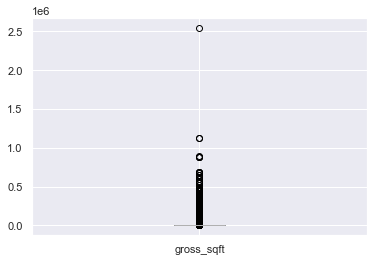

In [22]:
HP.boxplot(column='gross_sqft')

In [23]:
from scipy import stats
HP=HP[(np.abs(stats.zscore(HP)) < 3).all(axis=1)]

<AxesSubplot:>

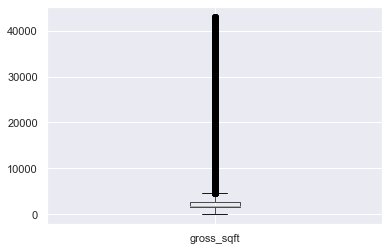

In [24]:
HP.boxplot(column='gross_sqft')

In [25]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression

In [26]:
X = HP.drop('sale_price',axis=1)
y = HP['sale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [27]:
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,VIF Factor,features
0,3.6,neighborhood
1,3.2,tax_class
2,10.1,block
3,13.0,lot
4,30.9,building_class
5,193739.1,zip_code
6,34867.1,residential_units
7,252.2,commercial_units
8,36445.2,total_units
9,19.1,land_sqft


In [28]:
del HP['zip_code']

In [29]:
X = HP.drop('sale_price',axis=1)
y = HP['sale_price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
vif["features"] = X.columns
vif.round(1)

C:\Users\Lenovo\anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1738: RuntimeWarning: invalid value encountered in double_scalars
  return 1 - self.ssr/self.uncentered_tss


,VIF Factor,features
0,3.6,neighborhood
1,3.2,tax_class
2,10.0,block
3,13.0,lot
4,30.9,building_class
5,34867.0,residential_units
6,252.2,commercial_units
7,36445.1,total_units
8,19.1,land_sqft
9,16.4,gross_sqft


In [31]:
del HP['total_units']

In [32]:
columns = ['YearAlter2', 'XCoord', 'year_of_sale',  'YCoord', 'ComArea','LotDepth', 'LotType', 'NumFloors', 'LotFront', 'tax_class_at_sale', 'building_class', 'ResArea', 'SplitZone', 'BldgDepth', 'ResidFAR', 'LandUse', 'HealthArea', 'gross_sqft', 'BldgFront', 'year_built', 'IrrLotCode', 'AssessTot', 'land_sqft', 'FacilFAR', 'building_class_at_sale', 'NumBldgs']
HP.drop(columns, inplace=True, axis=1)

In [33]:
HP.columns.values

array(['neighborhood', 'tax_class', 'block', 'lot', 'residential_units',
       'commercial_units', 'sale_price', 'OwnerName', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea',
       'ProxCode', 'BsmtCode', 'AssessLand', 'ExemptLand', 'ExemptTot',
       'YearAlter1', 'HistDist', 'BuiltFAR', 'CommFAR', 'street name'],
      dtype=object)

In [34]:
HP.head()

,neighborhood,tax_class,block,lot,residential_units,commercial_units,sale_price,OwnerName,OfficeArea,RetailArea,GarageArea,StrgeArea,FactryArea,OtherArea,ProxCode,BsmtCode,AssessLand,ExemptLand,ExemptTot,YearAlter1,HistDist,BuiltFAR,CommFAR,street name
1131,27,2.0,5124,18,39,0,9450000.0,4184,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,101250.0,0.0,0.0,2014.0,0,2.90,0.0,25893
1132,27,2.0,5124,45,38,0,9450000.0,4144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,85500.0,0.0,0.0,0.0,0,3.79,0.0,25893
1136,20,2.0,1206,31,41,0,9400000.0,1239,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,127800.0,0.0,0.0,2015.0,0,4.19,0.0,23907
1137,9,1.0,274,28,2,0,9400000.0,3668,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0,38370.0,0.0,0.0,2000.0,8,1.26,0.0,28848
1139,2,2.0,5979,46,0,0,9385000.0,78497,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,290250.0,0.0,0.0,0.0,0,3.90,0.0,924


In [35]:
HP.shape

(202178, 24)

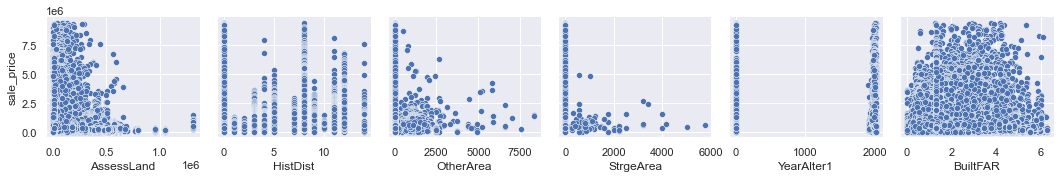

In [36]:
sns.pairplot(HP,y_vars=['sale_price'], x_vars=['AssessLand', 'HistDist', 'OtherArea', 'StrgeArea', 'YearAlter1', 'BuiltFAR'],palette='Dark2')

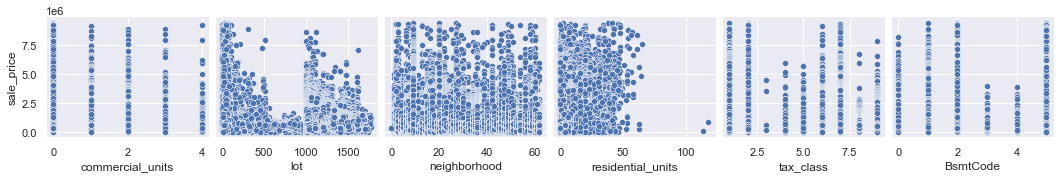

In [37]:
sns.pairplot(HP,y_vars=['sale_price'], x_vars=['commercial_units', 'lot', 'neighborhood', 'residential_units', 'tax_class', 'BsmtCode'],palette='Dark2')

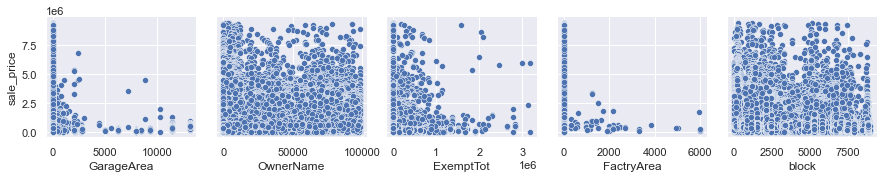

In [38]:
sns.pairplot(HP,y_vars=['sale_price'], x_vars=['GarageArea', 'OwnerName', 'ExemptTot', 'FactryArea', 'block'],palette='Dark2')

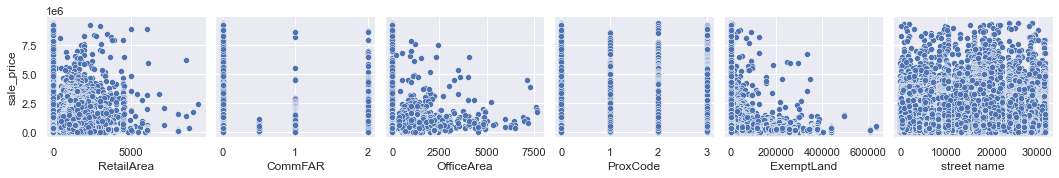

In [39]:
sns.pairplot(HP,y_vars=['sale_price'], x_vars=['RetailArea', 'CommFAR', 'OfficeArea', 'ProxCode', 'ExemptLand', 'street name'],palette='Dark2')

In [ ]:
X = HP.drop('sale_price',axis=1)
y = HP['sale_price']

Xtrn, Xtest, Ytrn, Ytest = train_test_split(X,y,test_size=0.3, random_state=42)
models = [LinearRegression(), linear_model.Lasso(alpha=0.1), Ridge(alpha=100.0), RandomForestRegressor(n_estimators=100, max_features='sqrt'), KNeighborsRegressor(n_neighbors=6),DecisionTreeRegressor(max_depth=4), ensemble.GradientBoostingRegressor()]

TestModels = pd.DataFrame()
tmp = {}
 
for model in models:
    print(model)
    m = str(model)
    tmp['Model'] = m[:m.index('(')]
    model.fit(Xtrn, Ytrn)
    tmp['R2_Price'] = r2_score(Ytest, model.predict(Xtest))
    print('score on training',model.score(Xtrn, Ytrn))
    print('r2 score',r2_score(Ytest, model.predict(Xtest)))
    TestModels = TestModels.append([tmp])
TestModels.set_index('Model', inplace=True)
 
fig, axes = plt.subplots(ncols=1, figsize=(10, 4))
TestModels.R2_Price.plot(ax=axes, kind='bar', title='R2_Price')
plt.show()

In [ ]:
HP.columns.values

In [ ]:
HP_list=list(HP.columns.values)
HP_list1=list(HP.columns.values)

names=HP_list1
feature_cols =['neighborhood', 'tax_class', 'block', 'lot', 'residential_units', 'commercial_units', 'OwnerName', 'OfficeArea',
       'RetailArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'ProxCode', 'BsmtCode', 'AssessLand', 'ExemptLand', 'ExemptTot',
       'YearAlter1', 'HistDist', 'BuiltFAR', 'CommFAR', 'street name']
target=['sale_price']
X=HP[feature_cols].dropna()
y=np.array(HP[target].dropna()).ravel()
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

#use linear regression as the model
model = ensemble.GradientBoostingRegressor()
model.fit(X_train, y_train)
#rank all features, i.e continue the elimination until the last one
rfe = RFE(model, n_features_to_select=10, step=1)
rfe.fit(X,y)
print('Features sorted by their rank:')
print(sorted(zip(map(lambda x: round(x, 4), rfe.ranking_), names)))

# Plot feature importance
feature_importance = model.feature_importances_
# make importances relative to max importance
feature_importance = 100.0 * (feature_importance / feature_importance.max())
sorted_idx = np.argsort(feature_importance)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.subplot(1, 2, 2)
plt.barh(pos, feature_importance[sorted_idx], align='center')
plt.yticks(pos, X.columns[sorted_idx])
plt.xlabel('Relative Importance')
plt.title('Variable Importance')
plt.show()

In [ ]:
columns = ['OfficeArea', 'GarageArea', 'StrgeArea', 'FactryArea', 'OtherArea', 'BsmtCode', 'CommFAR']
HP.drop(columns, inplace=True, axis=1)

In [ ]:
HP.head()

In [ ]:
X = HP.drop('sale_price',axis=1)
y = HP['sale_price']
Xtrn, Xtest, Ytrn, Ytest = train_test_split(X,y,test_size=0.3, random_state=42)

model = ensemble.GradientBoostingRegressor()
parameters = {'learning_rate':[0.1,0.2,0.3],'n_estimators':[50,100,150]}
grid_obj = GridSearchCV(model, parameters,refit=True,cv=3,verbose=10)
grid_obj = grid_obj.fit(Xtrn, Ytrn)
print(grid_obj.fit(Xtrn, Ytrn))

In [ ]:
grid_obj.best_params_

In [ ]:
params = grid_obj.best_params_
model = ensemble.GradientBoostingRegressor(**params)
model.fit(Xtrn, Ytrn.values.ravel())
test_score = np.zeros((params['n_estimators']),dtype=np.float64)

# Predict
Ypred = model.predict(Xtest)
model_mse = mean_squared_error(Ypred, Ytest)
model_rmse = np.sqrt(model_mse)
print('Gradient Boosting RMSE: %.4f' % model_rmse)
print('score on training',model.score(Xtrn, Ytrn))
print('r2 score',r2_score(Ytest, model.predict(Xtest)))
df = pd.DataFrame({'Actual': Ytest, 'Predicted': Ypred, 'Difference': Ypred-Ytest})
print(df.head())

for i,Ypred in enumerate(model.staged_predict(Xtest)):
    test_score[i]=model.loss_(Ytest.values.ravel(),Ypred)

# Plot training deviance
plt.figure(figsize=(10, 6))
plt.subplot(1, 2, 1)
plt.title('Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, model.train_score_, 'b-',label='Training Set Deviance')
plt.plot(np.arange(params['n_estimators']) + 1, test_score, 'r-', label='Test Set Deviance')
plt.legend(loc='upper right')
plt.xlabel('Boosting Iterations')
plt.ylabel('Deviance')

In [ ]:
colors=('red','blue')
plt.scatter(Ypred,Ytest,c=colors)
plt.xlabel('sale_price_pred')
plt.ylabel('sale_price_test')
plt.show